# Introdution
The central aim of Super-Resolution (SR) is to generate a higher resolution image from
lower resolution images. It is basically the process of retrieving the underlying high quality original image given a corrupted image.

## Why Super Resolution?
High resolution image offers a high pixel density and thereby more
details about the original scene. The need for high resolution is common in computer vision
applications for better performance in pattern recognition and analysis of images. High
resolution is of importance in medical imaging for diagnosis. Many applications require
zooming of a specific area of interest in the image wherein high resolution becomes
essential, e.g. surveillance, forensic and satellite imaging applications.

However, high resolution images are not always available. This is since the setup for high
resolution imaging proves expensive and also it may not always be feasible due to the
inherent limitations of the sensor, optics manufacturing technology. These problems can be
overcome through the use of image processing algorithms, which are relatively inexpensive,
giving rise to concept of super-resolution. It provides an advantage as it may cost less and
the existing low resolution imaging systems can still be utilized.

Camera image:

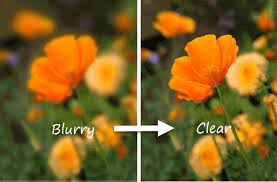

Security camera image:

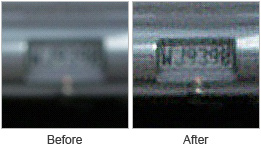

Geological image:

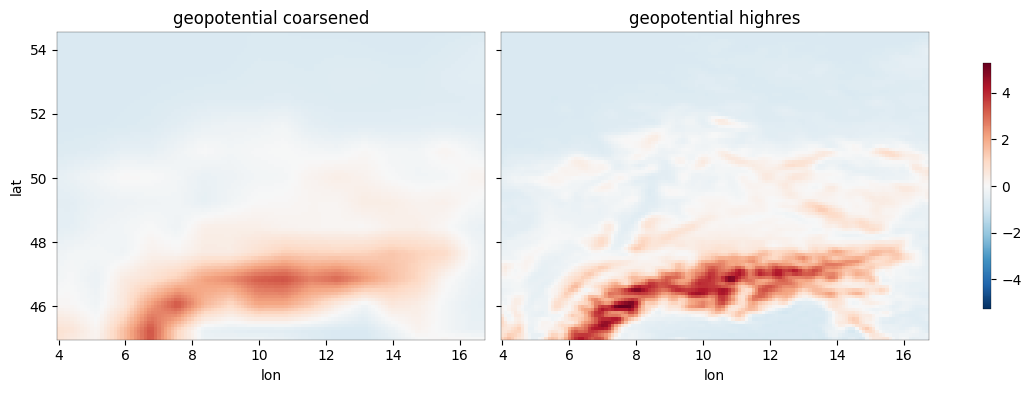

## How we create our dataset?
We always do not have low and high resolution images of the same scene. So we create our own dataset.
We take high resolution images (from net) and from that we create low resolution images by downscaling the high resolution images. We have used two methods for downscaling the images:
1. Bicubic Interpolation
2. Gaussian Blur

We won't discussing in detail about these methods. We will be using the Gaussian Blur method for downscaling the images.

# Main task
Our main task is given a low resolution image, we have to generate a high resolution image. We will be using the following methods for this task:
1. CNN (Convolutional Neural Network)
2. GANS (Generative Adversarial Networks)

As soon as we see the images dataset, first we think is about is Convolutions. So we will be using CNN for this task but why? 

## But why CNN? Why not MLP?

1. MLPs (Multilayer Perceptron) use one perceptron for each input (e.g. pixel in an image) and the amount of weights rapidly becomes unmanageable for large images. It includes too many parameters because it is fully connected. Each node is connected to every other node in next and the previous layer, forming a very dense web — resulting in redundancy and inefficiency. As a result, difficulties arise whilst training and overfitting can occur which makes it lose the ability to generalize.
2. Another common problem is that MLPs react differently to an input (images) and its shifted version — they are not translation invariant.
3. The main problems is that spatial information is lost when the image is flattened(matrix to vector) into an MLP.


### Basic implementation of CNN and MLP on Mnist dataset for classification.(you can skip if you know basics about CNN and MLP)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [5]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data for MLP
x_train_mlp = x_train.reshape((-1, 28*28))
x_test_mlp = x_test.reshape((-1, 28*28))

# Reshape the data for CNN
x_train_cnn = x_train.reshape((-1, 28, 28, 1))
x_test_cnn = x_test.reshape((-1, 28, 28, 1))

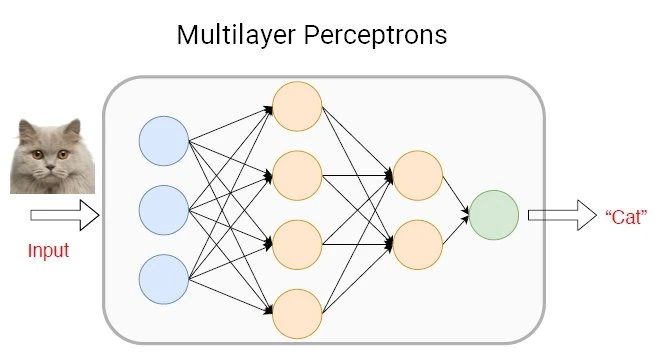

In [6]:
# MLP model
mlp_model = Sequential()
mlp_model.add(Dense(256, activation='relu', input_shape=(28*28,)))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))
mlp_model.summary()
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train MLP model
mlp_model.fit(x_train_mlp, y_train, epochs=10, batch_size=32, validation_data=(x_test_mlp, y_test))

# Evaluate MLP model
mlp_loss, mlp_accuracy = mlp_model.evaluate(x_test_mlp, y_test)
print("MLP Accuracy:", mlp_accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2051 - accuracy: 0.9395 - val_loss: 0.1189 - val_accuracy: 0.9636
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0852 - accuracy: 0.9729 - val_loss: 0.0767 - val_accur

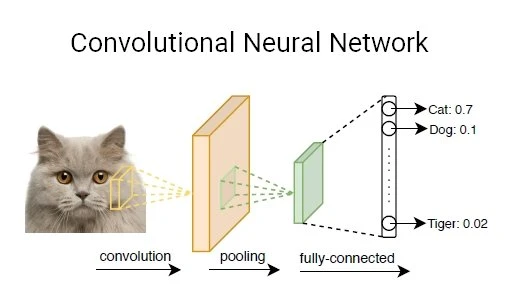

In [7]:
# CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.summary()
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(x_test_cnn, y_test))

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test)
print("CNN Accuracy:", cnn_accuracy)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               692352    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

1/1 [==============================] - 0s 82ms/step


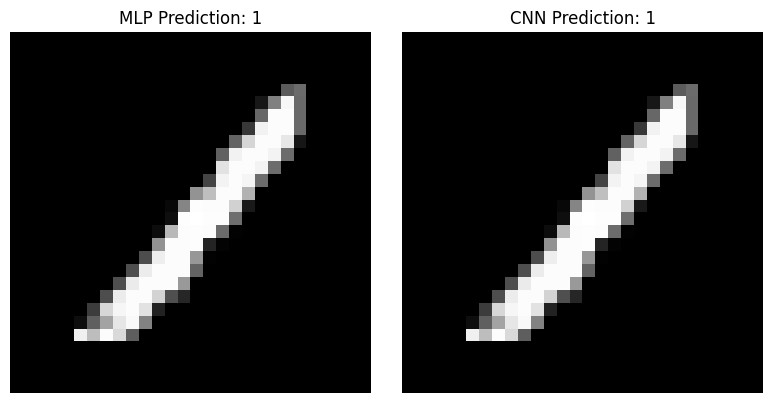

In [8]:

# Select a random image from the test set
index = np.random.randint(0, x_test.shape[0])

# Get the image and its label
image = x_test[index]
label = y_test[index]

# Reshape the image for MLP model prediction
image_mlp = image.reshape((1, 28*28))

# Reshape the image for CNN model prediction
image_cnn = image.reshape((1, 28, 28, 1))

# Predict using MLP model
mlp_prediction = np.argmax(mlp_model.predict(image_mlp))

# Predict using CNN model
cnn_prediction = np.argmax(cnn_model.predict(image_cnn))

# Plot the image and predictions
plt.figure(figsize=(8, 4))

# MLP plot
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f"MLP Prediction: {mlp_prediction}")
plt.axis('off')

# CNN plot
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title(f"CNN Prediction: {cnn_prediction}")
plt.axis('off')

plt.tight_layout()
plt.show()


CNN does perform well on image classification task than MLP but above for toy dataset MNIST the difference is not that much. But for real world dataset the difference is huge. 

Show the difference between MLP and CNN for real world dataset.(open MLP vs CNN using transfer learning VGG16 on Snake vs Antelope dataset.ipynb)

Here we can see that CNN is better than MLP for image classification. So we will be using CNN for our task. 

# GANS Generative Adversarial Networks

## How GANS works? Analogy: Counterfeiters and Police
1. Counterfeiters: Generator
2. Police: Discriminator

We have an ambitious young criminal who wants to counterfeit money. He has a printing machine and he wants to print fake money. He has no idea how real money looks like. So he prints some money and goes to a shop to buy something. The shopkeeper is the discriminator. The shopkeeper knows how real money looks like. So he can easily identify the fake money. So the criminal goes back and prints some more money. This time the money looks more real. He goes to the shopkeeper again. The shopkeeper again identifies the fake money. This process continues until the criminal is able to print the exact replica of the real money. Now the shopkeeper is not able to identify the fake money. So the criminal is able to buy anything from the shopkeeper. The criminal has successfully fooled the shopkeeper. The criminal is the generator and the shopkeeper is the discriminator. This results in very realistic fake money. This is how GANS work.

In this sense both of them are getting better. The generator is getting better at generating fake money and the discriminator is getting better at identifying fake money. This is how GANS work. 
The generator generates fake images and the discriminator tries to identify the fake images. The generator tries to fool the discriminator and the discriminator tries to identify the fake images. This process continues until the discriminator is not able to identify the fake images. At this point the generator has successfully fooled the discriminator. The generator is now able to generate fake images which are indistinguishable from the real images.

This results in very realistic images. This is how GANS work.

- The purpose of the generator Network is take random data initializations and decode it into synthetic sample
- The purpose of the discriminator Network is to then take this input from our Generator and predict whether or not this sample came from the real dataset or not.

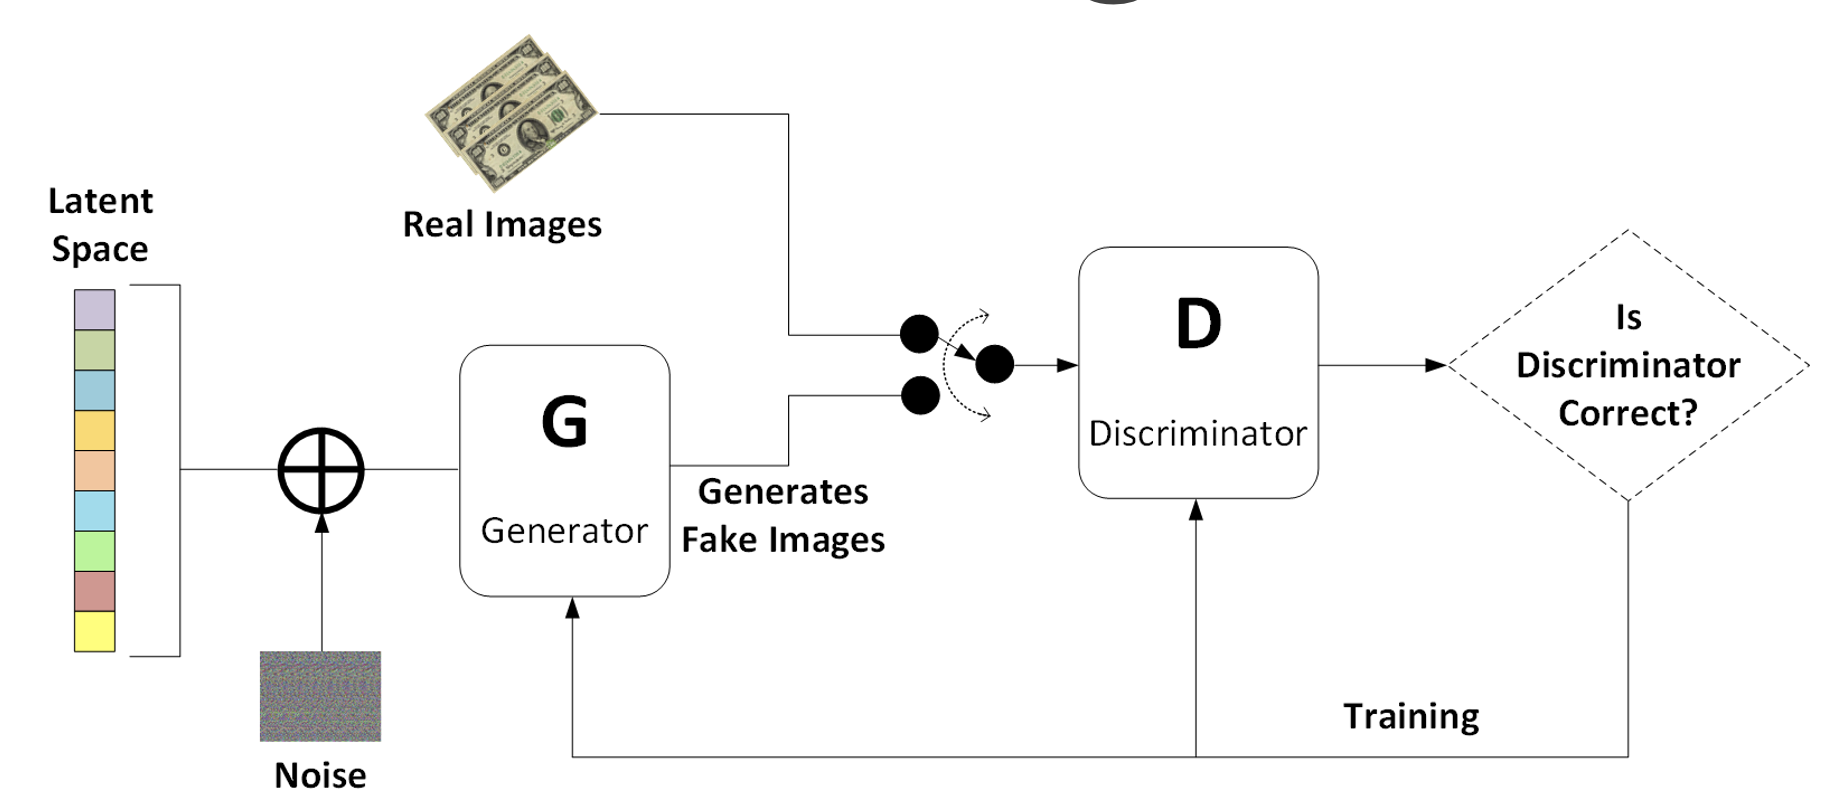

## Training GANS
- Training GANS is very difficult compared to Neural Networks we use gradient descent to change our weights and biases. But in GANS we have two networks generator and discriminator that works against eachother. So we have to train both of them simultaneously.
- We are not seeking to minimize a loss function. We are seeking to find an equilibrium between the generator and discriminator.
- Training stops when the discriminator is no longer able to distinguish between real and fake images.

### Training process
1. we randomly generate a noisy vector
2. input this noisy vector into the generator to generate a fake image
3. We take some sample data from our real data and mix it with the fake data.
4. We train the discriminator to classifyf this mixed data as real or fake and update the weights of the discriminator.
5. We then train the generator. We make more random noisy vectors and create synthetic images. With the weights of the discriminator frozen, we use the feedbcak from the discriminator to update the weights of the generator. 

This is how both Generator(to make better fake images) and Discriminator(to identify fake images) are getting better.

## Application of GANS:
1. Realistic photo generation
2. Image super-resolution
3. Imaage to image translation
4. Text to image translation
5. Semantic image to photo translation


## GANS for Super Resolution

Importing necessary libraries

In [9]:
from keras.datasets import mnist
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import LeakyReLU, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
import time



In [10]:
# a function to format display the losses
def hmsString(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# downsample and introduce noise in the images
def downSampleAndNoisyfi(X):
    shape = X[0].shape
    X_down = []
    for x_i in X:
       x_c = cv2.resize(x_i, (shape[0]//4, shape[1]//4), interpolation = cv2.INTER_AREA)
       x_c = np.clip(x_c+ np.random.normal(0, 5, x_c.shape) , 0, 255).astype('uint8')
       X_down.append(x_c)
    X_down = np.array(X_down, dtype = 'uint8')
    return X_down

### Code for Generator Block

In [11]:
def Generator(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(X_input)
    X = BatchNormalization(momentum=0.5)(X)
    X = Activation('relu')(X)
    X_shortcut = X
    X = Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(X)
    X = BatchNormalization(momentum=0.5)(X)
    X = Activation('relu')(X)  
    X = Add()([X_shortcut, X])  
    X_shortcut = X
    X = Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(X)
    X = BatchNormalization(momentum=0.5)(X)
    X = Activation('relu')(X)  
    X = Add()([X_shortcut, X])
    X = Activation('relu')(X)
    X = UpSampling2D(size=2)(X)
    
    X = Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(X)
    X = BatchNormalization(momentum=0.5)(X)
    X = Activation('relu')(X)
    X_shortcut = X
    X = Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(X)
    X = BatchNormalization(momentum=0.5)(X)
    X = Activation('relu')(X)
    X = Add()([X_shortcut, X])
    X_shortcut = X
    X = Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(X)
    X = BatchNormalization(momentum=0.5)(X)
    X = Activation('relu')(X)   
    X = Add()([X_shortcut, X])
    X = Activation('relu')(X)
    X = UpSampling2D(size=2)(X)
    
    X_shortcut = X
    X = Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(X)
    X = BatchNormalization(momentum=0.5)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = 1, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(X)
    X = BatchNormalization(momentum=0.5)(X)
    X = Activation('relu')(X)
    
    generator_model = Model(inputs=X_input, outputs=X)
    return generator_model



### Code for Discriminator Block

In [12]:
def Discriminator(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(X_input)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(X)
    X = BatchNormalization(momentum=0.8)(X)
    X = Activation('relu')(X)
    
    discriminator_model = Model(inputs=X_input, outputs=X)
    return discriminator_model



### Traing GANS

In [13]:
# One step of the test step
@tf.function
def train_step(X, Y, generator, discriminator, generator_optimizer, discriminator_optimizer):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(X, training=True)

    real_output = discriminator(Y, training=True)
    fake_output = discriminator(generated_images, training=False)

    gen_loss = tf.keras.losses.MSE(Y, generated_images)
    disc_loss = tf.keras.losses.MSE(real_output, fake_output)
    

    gradients_of_generator = gen_tape.gradient(\
        gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(\
        disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(
        gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(
        gradients_of_discriminator, 
        discriminator.trainable_variables))
  return gen_loss,disc_loss

# The main function to train the GAN
def train(X_train, Y_train, generator, discriminator, batch_size=100, epochs=50):
    generator_optimizer = tf.keras.optimizers.Adam(1.5e-4,0.5)
    discriminator_optimizer = tf.keras.optimizers.Adam(1.5e-4,0.5)
    start = time.time()
    for epoch in range(epochs):
        epoch_start = time.time()
        gen_loss_list = []
        disc_loss_list = []
        
        prev_i = 0
        for i in range(X_train.shape[0]):
            if((i+1)%batch_size == 0):
                t = train_step(X_train[prev_i:i+1], Y_train[prev_i:i+1], generator, discriminator, generator_optimizer, discriminator_optimizer)
                gen_loss_list.append(t[0])
                disc_loss_list.append(t[1])
                prev_i = i+1
        g_loss = np.sum(np.array(gen_loss_list)) / np.sum(np.array(gen_loss_list).shape)
        d_loss = np.sum(np.array(disc_loss_list)) / np.sum(np.array(disc_loss_list).shape)
        
        epoch_elapsed = time.time()-epoch_start
        print (f'Epoch {epoch+1}, gen loss={g_loss},disc loss={d_loss}, {hmsString(epoch_elapsed)}')
        
    elapsed = time.time()-start
    print (f'Training time: {hmsString(elapsed)}')
    


In [14]:
# loading the dataset(the original image are the HR 28*28 images)
(Y_train, _), (Y_test, _) = mnist.load_data()
# downsampling and introducing gaussian noise
# this downsampled and noised dataset is out X or inputs
X_train = downSampleAndNoisyfi(Y_train)
X_test = downSampleAndNoisyfi(Y_test)

# introduce a new dimension to the data (None, 28, 28, 1)
X_test = X_test[..., np.newaxis]
X_train = X_train[..., np.newaxis]
Y_train = Y_train[..., np.newaxis]
Y_test = Y_test[..., np.newaxis]

# Creating a generator model
# Showing the summary of generator 
generator = Generator((7,7,1))
generator.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 7, 7, 1)]            0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 7, 7, 32)             320       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 7, 7, 32)             128       ['conv2d_2[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 7, 7, 32)             0         ['batch_normalization[0][0

In [15]:
# Creating a discriminator model
# Showing the summary of discriminator
discriminator = Discriminator((28,28,1))
discriminator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_10 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_8 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 28, 28, 64)        0         
                                                           

In [ ]:
# training with batch size of 100 and for 50 epochs
train(X_train, Y_train, generator, discriminator, 100, 5) #50)

# save the generator model for future use
generator.save("mnist_generator_model")
generator.save("mnist_generator_model.h5")

Here we have run only for 5 epochs but you can run for more epochs to get better results.

313/313 [==============================] - 9s 27ms/step


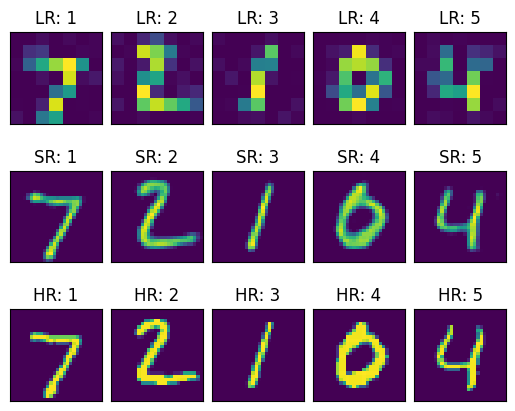

In [ ]:
# testing the model
Y_pred = generator.predict(X_test)
# showing the first 5 results
fig,a =  plt.subplots(3,5)
fig.subplots_adjust(hspace=0.5, wspace=0.1)
for i in range(5):
    a[0][i].imshow(X_test[i])
    a[0][i].axes.get_xaxis().set_visible(False)
    a[0][i].axes.get_yaxis().set_visible(False)
    a[0][i].title.set_text("LR: "+str(i+1))
    
    a[1][i].imshow(Y_pred[i])
    a[1][i].axes.get_xaxis().set_visible(False)
    a[1][i].axes.get_yaxis().set_visible(False)
    a[1][i].title.set_text("SR: "+str(i+1)) 
    
    a[2][i].imshow(Y_test[i])
    a[2][i].axes.get_xaxis().set_visible(False)
    a[2][i].axes.get_yaxis().set_visible(False)
    a[2][i].title.set_text("HR: "+str(i+1)) 
    


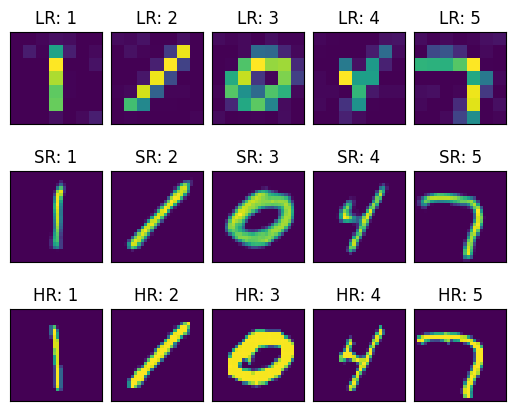

In [ ]:
# showing the first 5 random results
import random
figb,ab =  plt.subplots(3,5)
figb.subplots_adjust(hspace=0.5, wspace=0.1)
for i in range(5):
    ii = random.randint(0, 10000) 
    
    ab[0][i].imshow(X_test[ii])
    ab[0][i].axes.get_xaxis().set_visible(False)
    ab[0][i].axes.get_yaxis().set_visible(False)
    ab[0][i].title.set_text("LR: "+str(i+1))
    
    ab[1][i].imshow(Y_pred[ii])
    ab[1][i].axes.get_xaxis().set_visible(False)
    ab[1][i].axes.get_yaxis().set_visible(False)
    ab[1][i].title.set_text("SR: "+str(i+1)) 
    
    ab[2][i].imshow(Y_test[ii])
    ab[2][i].axes.get_xaxis().set_visible(False)
    ab[2][i].axes.get_yaxis().set_visible(False)
    ab[2][i].title.set_text("HR: "+str(i+1)) 

Well GAN does perform good but it has some problems.

### Problem with GANS:
- **Achieving equilibrium**: between the generator and discriminator is very difficult.
- **Time**: Training gans is computationally expensive and necessitates tweaking of hyperparameters such as initializations, altering hidden layers, different activation, using Batch Normalization or Dropout, etc.
- **Bad Initializations**: If the generator and discriminator are not initialized properly, then the training will fail.
- **Mode Collapse**: happens when regardless of the nosie input fed into your generator, the generated output varies very little. It occurs when a small set of images look good to the descriminator and get scored better than other images. The GAN simple learns to reproduce those images over and over again. Analgous to overfittiing.

One quick solution to the problem of high training time is to use transfer learning using VGG16 or VGG19 in Generator and discriminator architecture. This will reduce the training time.